In [70]:
from random import randint

def gencoordinates(m, n1,n2):
    seen = set()

    x, y = randint(m, n1), randint(m, n2)

    while True:
        seen.add((x, y))
        yield (x, y)
        x, y = randint(m, n1), randint(m, n2)
        while (x, y) in seen:
            x, y = randint(m, n1), randint(m, n2)

In [71]:
nsubtlety, nstatpos, ncolor = 6,2,2 # recollapses with have same start position
variants = 3
nrequired_vids = nsubtlety*nstatpos * ncolor *variants
nrequired_vids

72

loop order: subtlety variations, initpos variations, color variations

In [72]:
subt_angle = 10*np.arange(0,16,3)
subt_angle

array([  0,  30,  60,  90, 120, 150])

In [73]:
world = [1200,900]
g = gencoordinates(0, world[0],world[1])
coords = []
for i in range(nrequired_vids):
    coords.append(next(g))

In [74]:
coords_array = np.array(coords)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[12 13 14 15 16 17 18 19 20 21 22 23]
[24 25 26 27 28 29 30 31 32 33 34 35]
[36 37 38 39 40 41 42 43 44 45 46 47]
[48 49 50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69 70 71]


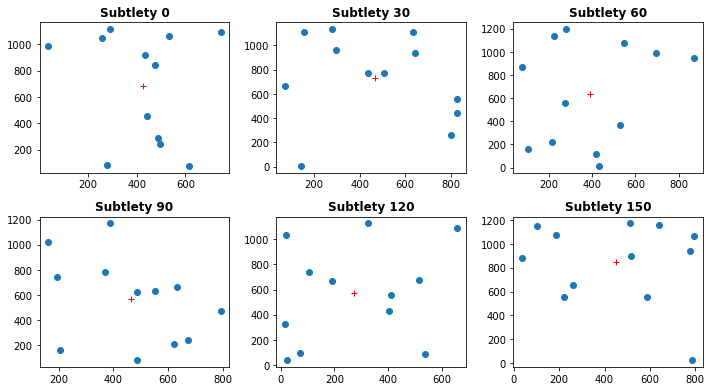

In [75]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(1,figsize=(10,8))
for subt in range(6):
    plt.subplot(3,3,subt+1)
    rows = np.arange(subt*12,(subt+1)*12)
    print(rows)
    plt.plot(coords_array[rows,1],coords_array[rows,0], ls = 'None',marker = 'o')
    plt.plot(coords_array[rows,1].mean(),coords_array[rows,0].mean(),color='r',marker = '+')
    plt.title('Subtlety ' + str(subt_angle[subt]), fontweight='bold')
plt.tight_layout()

In [76]:
#import csv
import json

data = {}
data['x'] = list(coords_array[:,0])
data['x'] = [int(i) for i in data['x']]
data['y'] = list(coords_array[:,1])
data['y'] = [int(i) for i in data['y']]

json_data = json.dumps(data)
print(json_data)

{"x": [1089, 453, 839, 1113, 241, 286, 985, 77, 1050, 920, 82, 1064, 1106, 770, 773, 933, 258, 7, 442, 959, 1108, 1131, 666, 561, 1075, 372, 118, 1195, 948, 219, 162, 15, 873, 987, 558, 1141, 620, 162, 473, 210, 633, 83, 743, 1023, 667, 785, 245, 1170, 1126, 675, 1031, 665, 40, 88, 426, 1089, 327, 741, 98, 556, 901, 1152, 1155, 26, 1075, 1172, 551, 885, 658, 1066, 558, 939], "y": [745, 444, 476, 291, 497, 487, 37, 616, 259, 436, 280, 531, 157, 438, 505, 643, 802, 143, 829, 297, 634, 280, 72, 829, 546, 528, 417, 281, 871, 213, 105, 431, 75, 694, 276, 224, 486, 206, 793, 621, 554, 488, 193, 162, 634, 369, 675, 388, 326, 514, 19, 191, 24, 538, 402, 659, 16, 107, 73, 413, 517, 101, 640, 788, 185, 511, 587, 34, 261, 796, 219, 777]}


In [77]:
len(data['x'])

72

In [78]:
with open('mimic_start_position.json', 'w') as outfile:
    json.dump(json_data, outfile)

In [79]:
x = iter({'a','b','c'})
print(next(x))

a


In [80]:
import csv
with open('mimic_start_position.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['x','y'])
    for row in coords:
        csv_out.writerow(row)

# read json file and plot start points

In [81]:
import os
import json
os.getcwd()

'/Users/f0053cz/Documents/psyanim_notapp/psyanim_notapp_new_mimic_expt/test_version'

In [82]:
fileName = 'mimic_start_position.json'
with open(fileName) as json_data:
# with open(flnames[0]) as json_data:
    data1 = json.load(json_data)
data1

'{"x": [1089, 453, 839, 1113, 241, 286, 985, 77, 1050, 920, 82, 1064, 1106, 770, 773, 933, 258, 7, 442, 959, 1108, 1131, 666, 561, 1075, 372, 118, 1195, 948, 219, 162, 15, 873, 987, 558, 1141, 620, 162, 473, 210, 633, 83, 743, 1023, 667, 785, 245, 1170, 1126, 675, 1031, 665, 40, 88, 426, 1089, 327, 741, 98, 556, 901, 1152, 1155, 26, 1075, 1172, 551, 885, 658, 1066, 558, 939], "y": [745, 444, 476, 291, 497, 487, 37, 616, 259, 436, 280, 531, 157, 438, 505, 643, 802, 143, 829, 297, 634, 280, 72, 829, 546, 528, 417, 281, 871, 213, 105, 431, 75, 694, 276, 224, 486, 206, 793, 621, 554, 488, 193, 162, 634, 369, 675, 388, 326, 514, 19, 191, 24, 538, 402, 659, 16, 107, 73, 413, 517, 101, 640, 788, 185, 511, 587, 34, 261, 796, 219, 777]}'

In [83]:
if type(data1) == str:
    print('evaluating string')
    data1 = eval(data1)
data1.keys(), len(data1['x'])

evaluating string


(dict_keys(['x', 'y']), 72)

In [84]:
rows =  np.arange((subt-1)*6,subt*6)
#rows = [int(i) for i in rows]
#rows = slice(rows)
rows

array([24, 25, 26, 27, 28, 29])

0 [0 1 2 3 4 5]
1 [ 6  7  8  9 10 11]
2 [12 13 14 15 16 17]
3 [18 19 20 21 22 23]
4 [24 25 26 27 28 29]
5 [30 31 32 33 34 35]


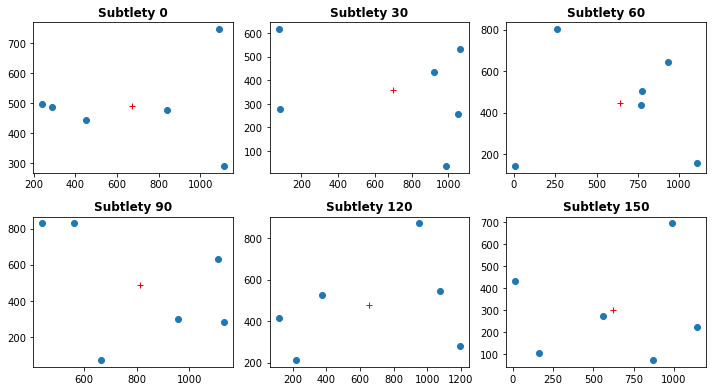

In [85]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1,figsize=(10,8))
for subt in range(6):
    plt.subplot(3,3,subt+1)
    rows =  np.arange(subt*6,(subt+1)*6)
    print(subt, rows)
    x,y = np.array(data1['x'])[rows],np.array(data1['y'])[rows]
    plt.plot(x,y,marker = 'o',ls = 'None')
    plt.plot(x.mean(),y.mean(),color='r',marker = '+')
    plt.title('Subtlety ' + str(subt_angle[subt]), fontweight='bold')

plt.tight_layout()